### Connor Contursi - Task 3

# Data Processing

In [33]:
# module imports
import numpy as np
import pandas as pd
import os

# Sklearn module imports
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

up_path = 'C:/Users/indie/Documents/495/IMU class data/up'
down_path = 'C:/Users/indie/Documents/495/IMU class data/down'
go_path = 'C:/Users/indie/Documents/495/IMU class data/go'
stop_path = 'C:/Users/indie/Documents/495/IMU class data/stop'
#---------------------------------------------------

# Combines class data for up audio into single set
class_up = pd.DataFrame()
up_files = 0

for subdir, dirs, files in os.walk(up_path):
    for file in files:
        os.chdir(subdir)
        up_array = np.genfromtxt(file, delimiter=",", dtype=str, usecols=range(64), skip_header = 1)
        up_array = up_array.reshape(25, 64)
        up_data_array = pd.DataFrame(up_array)
        class_up = pd.concat([class_up, up_data_array])
        up_files += 1
#----------------------------------------------------------------------------------                
        
# Combines class data for down audio into single set
class_down = pd.DataFrame()
down_files = 0

for subdir, dirs, files in os.walk(down_path):
    for file in files:
        os.chdir(subdir)
        down_array = np.genfromtxt(file, delimiter=",", dtype=str, usecols=range(64),skip_header=1)
        down_array = down_array.reshape(25, 64)
        down_data_array = pd.DataFrame(down_array)
        class_down = pd.concat([class_down, down_data_array])
        down_files += 1
#----------------------------------------------------------------------------------        

# Combines class data for go audio into single set
class_go = pd.DataFrame()
go_files = 0

for subdir, dirs, files in os.walk(go_path):
    for file in files:
        os.chdir(subdir)
        go_array = np.genfromtxt(file, delimiter=",", dtype=str, usecols=range(64),skip_header=1)
        go_array = go_array.reshape(25, 64)
        go_data_array = pd.DataFrame(go_array)
        class_go = pd.concat([class_go, go_data_array])
        go_files += 1
#----------------------------------------------------------------------------------

# Combines class data for stop audio into single set
class_stop = pd.DataFrame()
stop_files = 0

for subdir, dirs, files in os.walk(stop_path):
    for file in files:
        os.chdir(subdir)
        stop_array = np.genfromtxt(file, delimiter=",", dtype=str, usecols=range(64),skip_header=1)
        stop_array = stop_array.reshape(25, 64)
        stop_data_array = pd.DataFrame(stop_array)
        class_stop = pd.concat([class_stop, stop_data_array])
        stop_files += 1
#----------------------------------------------------------------------------------

# Combines all of class data for wave and fistbumps into single set
class_data = pd.concat([class_up, class_down, class_go, class_stop])

# Creates y labels
y = np.zeros((up_files + down_files + go_files + stop_files) * 25)
for a in range (up_files * 25, (up_files + down_files) * 25, 1):
    y[a] = 1
for b in range ((up_files + down_files) * 25, (up_files + down_files + go_files) * 25, 1):
    y[b] = 2
for c in range ((up_files + down_files + go_files) * 25, (up_files + down_files + go_files + stop_files) * 25, 1):
    y[c] = 3

[0. 0. 0. ... 3. 3. 3.]


### Logistic Regression Model & Results

              precision    recall  f1-score   support

         0.0       0.41      0.48      0.44        87
         1.0       0.43      0.43      0.43        92
         2.0       0.30      0.24      0.26        84
         3.0       0.34      0.34      0.34        87

    accuracy                           0.38       350
   macro avg       0.37      0.38      0.37       350
weighted avg       0.37      0.38      0.37       350



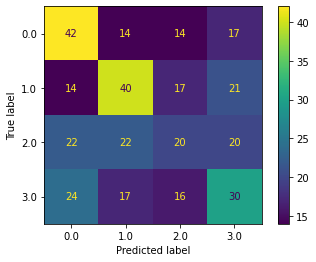

In [34]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(class_data, y, test_size = 0.20)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Decision Trees Model & Results

              precision    recall  f1-score   support

         0.0       0.25      0.27      0.26        91
         1.0       0.26      0.29      0.27        83
         2.0       0.30      0.24      0.26        85
         3.0       0.26      0.25      0.26        91

    accuracy                           0.26       350
   macro avg       0.27      0.26      0.26       350
weighted avg       0.27      0.26      0.26       350



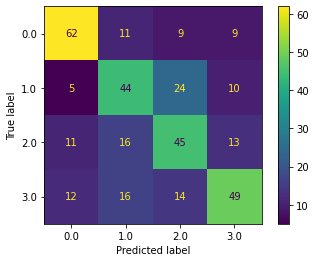

In [35]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(class_data, y, test_size = 0.20)

# creates decision tree classifier; fits data with trained sets; generates predictions from test split
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Random Forests Model & Results

              precision    recall  f1-score   support

         0.0       0.27      0.28      0.28        99
         1.0       0.22      0.23      0.22        87
         2.0       0.22      0.18      0.20        82
         3.0       0.24      0.26      0.25        82

    accuracy                           0.24       350
   macro avg       0.24      0.24      0.24       350
weighted avg       0.24      0.24      0.24       350



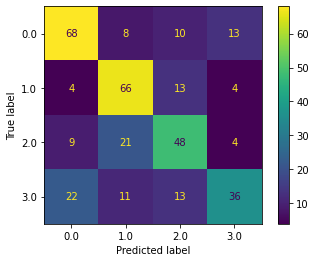

In [36]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(class_data, y, test_size = 0.20)

# creates random forest classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))